# Part A)


## Similarity between Benford's Law and Zipf's Law

**1. Power Law Distributions:**
   - Both Benford's Law and Zipf's Law are examples of power-law distributions. Power-law distributions are characterized by a small number of elements having very high frequency or magnitude, while the majority have lower frequency or magnitude.

**2. Heavy Tails:**
   - Both laws exhibit heavy tails in their distributions, meaning that there is a significant probability of observing values that are much larger than the average.

**3. Zipf's Law as a Special Case:**
   - Zipf's Law is a specific case of the broader class of power-law distributions. Benford's Law can be considered a form of Zipf's Law applied to the distribution of leading digits in numerical datasets.

**4. Common Appearance in Natural Phenomena:**
   - Both laws are observed in various natural phenomena. Zipf's Law is commonly found in the distribution of word frequencies in natural languages, and Benford's Law is often observed in datasets related to numbers occurring in diverse contexts, such as financial data, population numbers, or scientific measurements.

**5. Scale Invariance:**
   - Both laws exhibit a degree of scale invariance, meaning that the distribution pattern remains similar regardless of the scale of observation.


## How did I fit Zipf's Law to Benford's Law?

Firstly, we have Zipf's Law as follows:

\begin{align*}
\text{Frequency(F) of rank(r) : } F = \frac{1}{(r + b)^a}
\end{align*}

Then, we have Benford's Law as follows:

\begin{align*}
\text{Probability(P) of digit(d) : } P = \log_{10}(1 + \frac{1}{d})
\end{align*}


now we have this two parameters a and b, which we need to find out. So, we have to fit Zipf's Law to Benford's Law. I changed $a$ and $b$ values and found out that $(a = 1.3, b = 1.7)$ is the best fit for Zipf's Law to Benford's Law. (The code for finding the fit is not included)

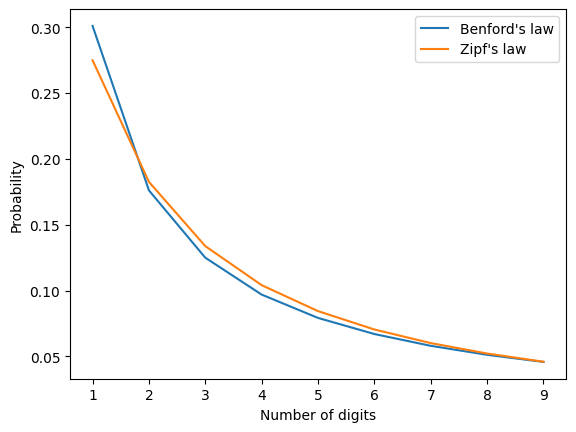

In [ ]:
from math import log10
import matplotlib.pyplot as plt

# Ben-ford's law
Pd = lambda d: log10(1 + 1 / d)

# Zipf's law
Zipf = lambda r, a, b: 1 / (r + b) ** a

# Plot graph for number of digits 1 to 9
plt.plot(range(1, 10), [Pd(d) for d in range(1, 10)])

# Plot graph for Zipf's law
plt.plot(range(1, 10), [Zipf(r, 1.3, 1.7) for r in range(1, 10)])  # a = 1.3, b = 1.7

# Add labels
plt.xlabel('Number of digits')
plt.ylabel('Probability')

# add legend
plt.legend(['Benford\'s law', 'Zipf\'s law'])

# Show graph
plt.show()

# Part B)
* Part B.1: scipy constants values distribution
* Part B.2: Benford's law for factorial values and powers of 2 numbers
* Part B.3: find best value of $a$ that is best fit for **Pareto distribution** to Benford's law
$$f(x;a) = \frac{a}{x^{a+1}}$$
* Part B.4 Weibull distribution for Benford's law
$$f(x;\lambda,k) = \frac{k}{\lambda}(\frac{x}{\lambda})^{k-1}e^{-(\frac{x}{\lambda})^k}$$
* Part B.5: Log-normal distribution for Benford's law
$$f(x;\mu,\sigma) = \frac{1}{x\sigma\sqrt{2\pi}}e^{-\frac{(\ln x - \mu)^2}{2\sigma^2}}$$

In [3]:
# Part B.1: scipy constants values distribution

import scipy.constants as spc

# put all the constants in a list
constants = [attr for attr in dir(spc) if not attr.startswith('__')]
constants = [str(getattr(spc, attr)) for attr in constants]

# remove all the constants that are not numbers
constants = [constant for constant in constants if constant.replace('.', '', 1).isdigit()]
# remove all '.' from the constants
constants = [constant.replace('.', '') for constant in constants]
# remove all '0' from the constants and extract the first digit
constants = [constant.replace('0', '')[0] for constant in constants]

# count 1,2,3,4,5,6,7,8,9 in first digit of constants
first_digit_count = {digit: constants.count(str(digit)) for digit in range(1, 10)}

import pandas as pd

# create a dataframe from first_digit_count
df = pd.DataFrame.from_dict(first_digit_count, orient='index', columns=['count'])

# add a column for probability
df['probability'] = df['count'] / df['count'].sum()

df

,count,probability
1,46,0.455446
2,11,0.108911
3,14,0.138614
4,11,0.108911
5,2,0.019802
6,4,0.039604
7,4,0.039604
8,3,0.029703
9,6,0.059406


# Analysis
  * Here we see some similarities between Benford's law and scipy constants values distribution.
    * However, the probability of the first digit in constants is not the same as Benford's law, we can see that in the graph below.
    * We have a lot of constants that start with 1, and the probability of the first digit in constants is not the same as Benford's law.
    * And much less probability for the first digit in constants is 2, 5, 6, 7, 8.

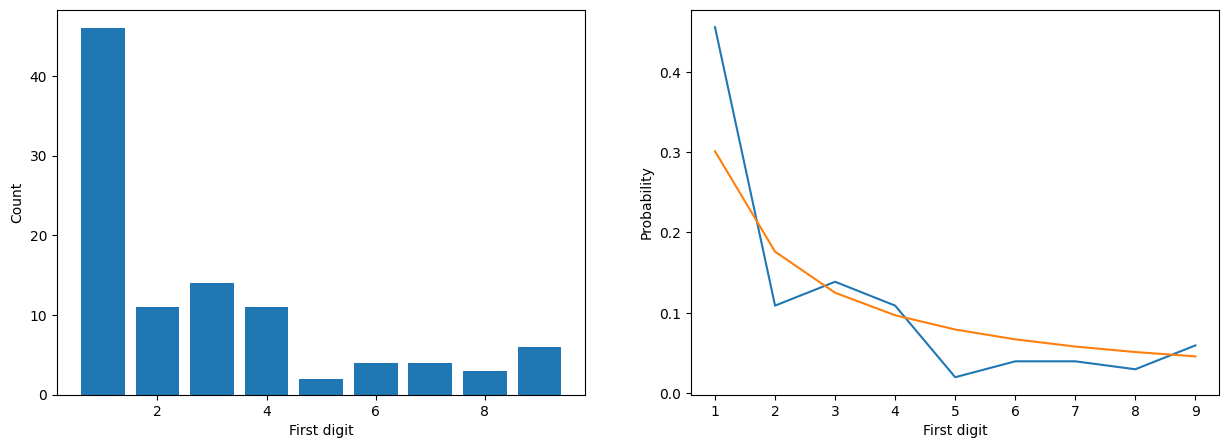

In [4]:
import matplotlib.pyplot as plt

# graph for first digit count, and probability
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# plot count bar graph
ax[0].bar(df.index, df['count'])

# plot probability bar graph
ax[1].plot(df.index, df['probability'])

# add labels
ax[0].set_xlabel('First digit')
ax[0].set_ylabel('Count')

# add labels
ax[1].set_xlabel('First digit')
ax[1].set_ylabel('Probability')

# adding Benford's law to the graph
ax[1].plot(range(1, 10), [Pd(d) for d in range(1, 10)])

# show graph
plt.show()

In [5]:
# Part B.2: Benford's law for factorial values and powers of 2 numbers

# factorial function
Factorial = lambda n: 1 if n == 0 else n * Factorial(n - 1)
# powers of 2 function
PowersOf2 = lambda n: 1 if n == 0 else 2 * PowersOf2(n - 1)

# list of factorials
list_of_factorials = [str(Factorial(n))[0] for n in range(1, 100)]
# list of powers of 2
list_of_powers_of_2 = [str(PowersOf2(n))[0] for n in range(1, 100)]

# count 1,2,3,4,5,6,7,8,9 in first digit of factorials
factorial_first_digit_count = {digit: list_of_factorials.count(str(digit)) for digit in range(1, 10)}
# count 1,2,3,4,5,6,7,8,9 in first digit of powers of 2
powers_of_2_first_digit_count = {digit: list_of_powers_of_2.count(str(digit)) for digit in range(1, 10)}

# convert to dataframe
factorial_df = pd.DataFrame.from_dict(factorial_first_digit_count, orient='index', columns=['count'])
powers_of_2_df = pd.DataFrame.from_dict(powers_of_2_first_digit_count, orient='index', columns=['count'])

# add probability column
factorial_df['probability'] = factorial_df['count'] / factorial_df['count'].sum()
powers_of_2_df['probability'] = powers_of_2_df['count'] / powers_of_2_df['count'].sum()

# show two dataframes side by side adding labels as well
pd.concat([factorial_df, powers_of_2_df], axis=1, keys=['Factorial', 'Powers of 2'])

Factorial             Powers of 2            
      count probability       count probability
1        30    0.303030          29    0.292929
2        18    0.181818          17    0.171717
3        13    0.131313          13    0.131313
4         7    0.070707          10    0.101010
5         7    0.070707           7    0.070707
6         7    0.070707           7    0.070707
7         3    0.030303           6    0.060606
8        10    0.101010           5    0.050505
9         4    0.040404           5    0.050505

# Analysis
  * For factorial values, we can see that the probability of the first digit is the same as Benford's law.
    * However, for 4, 7, 8 we have a little bit of difference.
#
  * For powers of 2 values, we can see it fits Benford's law very well, much better than factorial values.
 

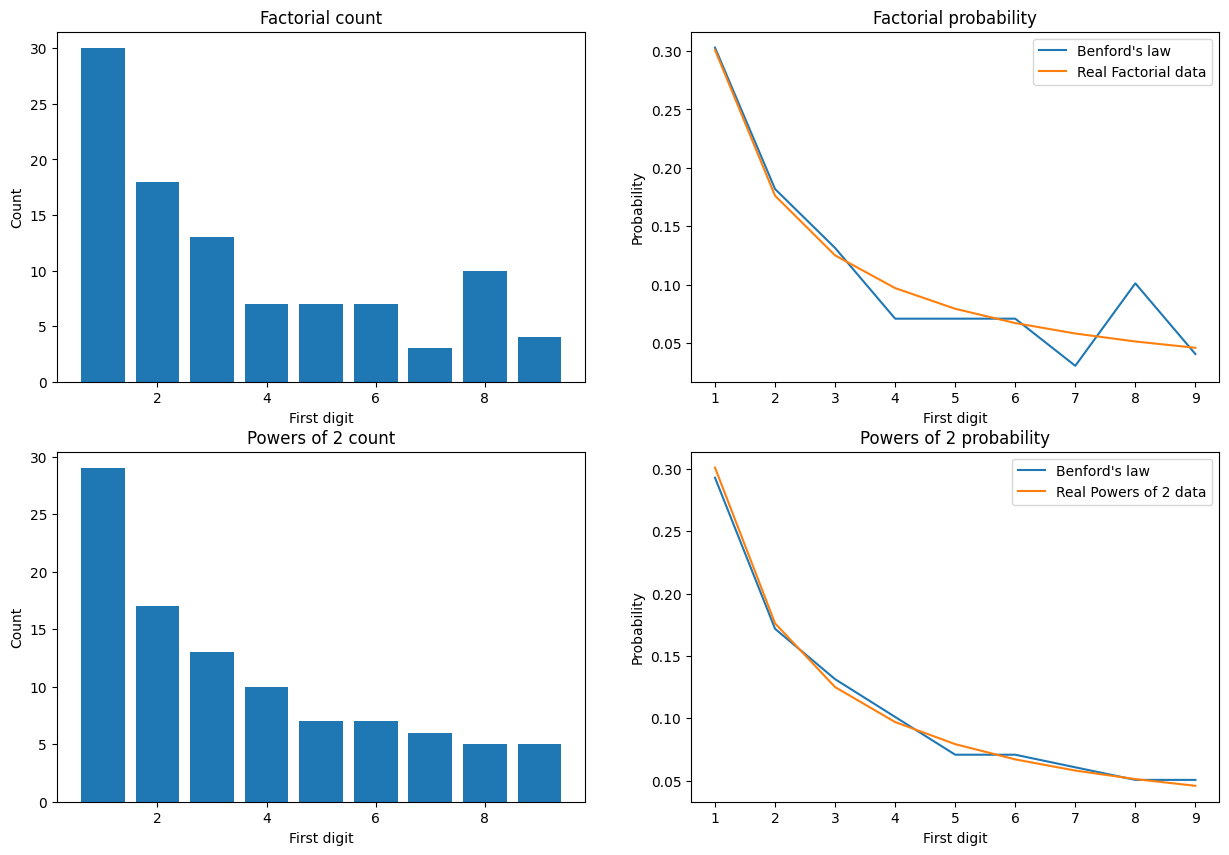

In [6]:
import matplotlib.pyplot as plt

# graph for first digit count, and probability for two dataframes
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# first digit count bar graph for factorial
ax[0, 0].bar(factorial_df.index, factorial_df['count'])
# first digit count bar graph for powers of 2
ax[1, 0].bar(powers_of_2_df.index, powers_of_2_df['count'])

# probability bar graph for factorial
ax[0, 1].plot(factorial_df.index, factorial_df['probability'])
# probability bar graph for powers of 2
ax[1, 1].plot(powers_of_2_df.index, powers_of_2_df['probability'])

# adding Benford's law to the graph
ax[0, 1].plot(range(1, 10), [Pd(d) for d in range(1, 10)])
ax[1, 1].plot(range(1, 10), [Pd(d) for d in range(1, 10)])

# add labels
ax[0, 0].set_xlabel('First digit')
ax[0, 0].set_ylabel('Count')
ax[1, 0].set_xlabel('First digit')
ax[1, 0].set_ylabel('Count')

# add labels
ax[0, 1].set_xlabel('First digit')
ax[0, 1].set_ylabel('Probability')
ax[1, 1].set_xlabel('First digit')
ax[1, 1].set_ylabel('Probability')

# add legend
ax[0, 1].legend(['Benford\'s law', 'Real Factorial data'])
ax[1, 1].legend(['Benford\'s law', 'Real Powers of 2 data'])

# adding title to each two graphs
ax[0, 0].set_title('Factorial count')
ax[1, 0].set_title('Powers of 2 count')
ax[0, 1].set_title('Factorial probability')
ax[1, 1].set_title('Powers of 2 probability')

# show graph
plt.show()

# Analysis

  * In the cell below, I have plotted the graph for Benford's law and Pareto distribution for different values of $a$.
and the best fit for Pareto distribution to Benford's law is $a = 1$.
  * For $a > 1$ we have a lot of difference between Pareto distribution and Benford's law.

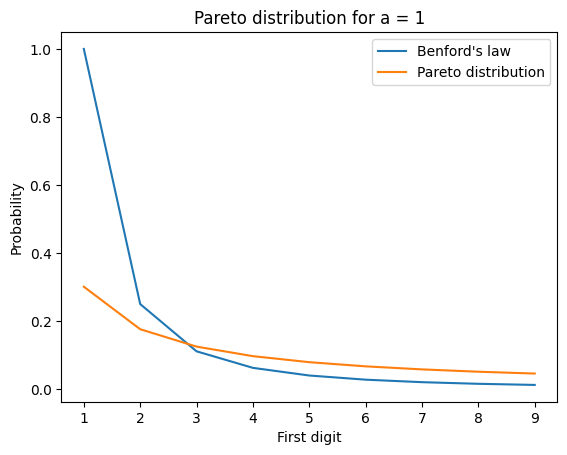

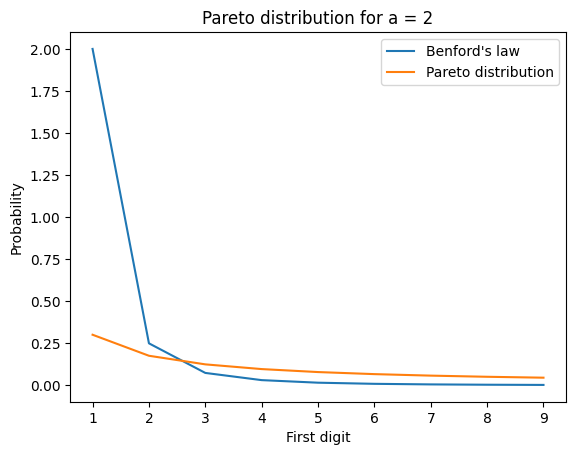

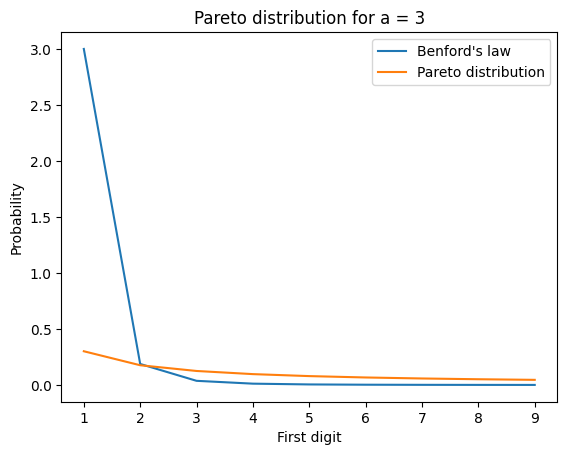

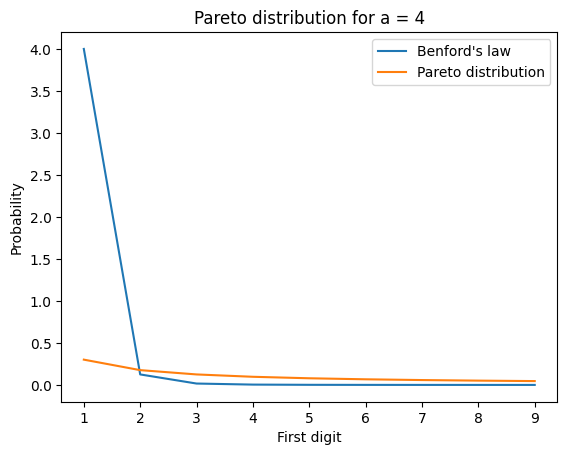

In [7]:
# Part B.3: find best value of $a$ that is best fit for Pareto distribution to Benford's law
Pareto = lambda x, a, xm: (a * xm ** a) / (x ** (a + 1))  # for first digit xm = 1

# a from 1 to 4
for a in range(1, 5):
  # plot graph for Pareto distribution
  plt.plot(range(1, 10), [Pareto(x, a, 1) for x in range(1, 10)])
  # plot graph for Benford's law
  plt.plot(range(1, 10), [Pd(d) for d in range(1, 10)])

  # add title for each graph
  plt.title(f'Pareto distribution for a = {a}')

  # add labels
  plt.xlabel('First digit')
  plt.ylabel('Probability')

  # add legend
  plt.legend(['Benford\'s law', 'Pareto distribution'])

  # show graph
  plt.show()

# Analysis

  * In the cell below, I have plotted the graph for Benford's law and Weibull distribution for different values of $k$.
And it seems that best fit for Weibull distribution to Benford's law is $k = 1$.
  * For $k > 1$ we have a lot of difference between Weibull distribution and Benford's law. same as Pareto distribution.
  * However, it fits better than Pareto distribution.

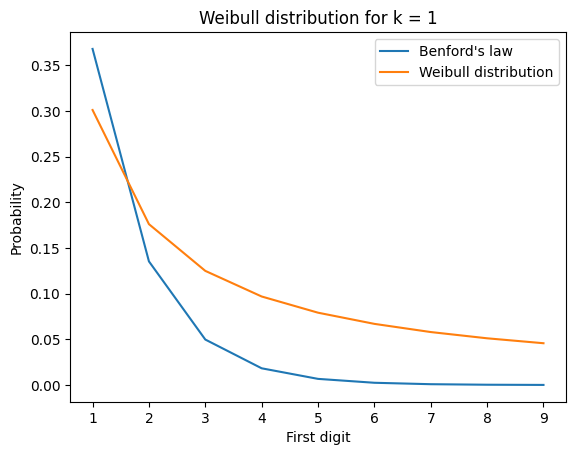

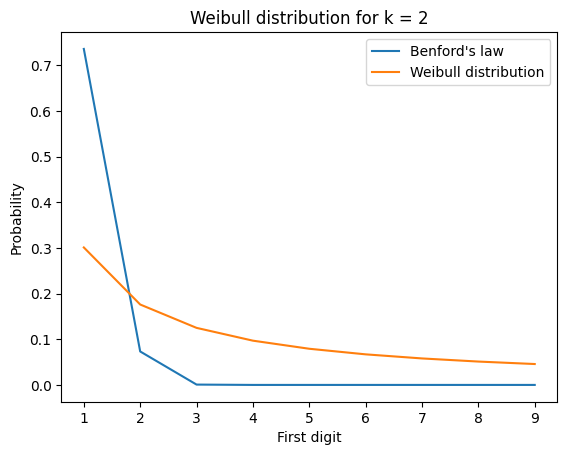

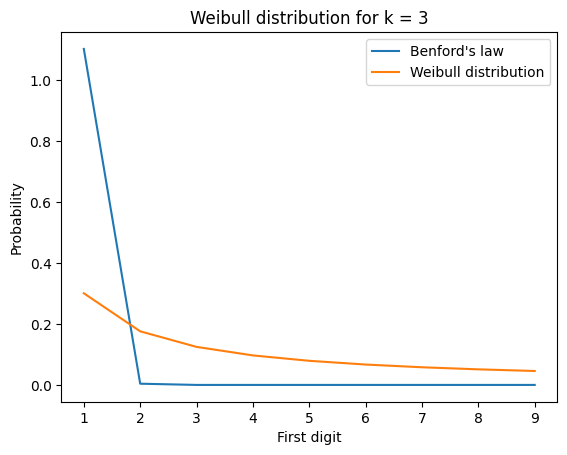

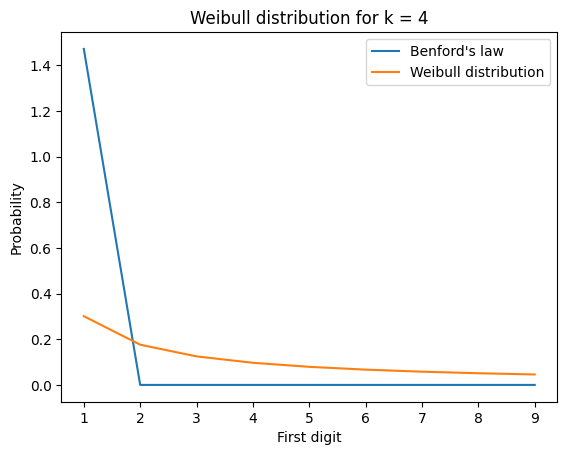

In [8]:
# part B.4 Weibull distribution for Benford's law
import numpy as np

# weibull distribution
Weibull = lambda x, k, l: (k / l) * (x / l) ** (k - 1) * np.exp(-(x / l) ** k)

# k from 1 to 4
for k in range(1, 5):
  # plot graph for Weibull distribution
  plt.plot(range(1, 10), [Weibull(x, k, 1) for x in range(1, 10)])
  # plot graph for Benford's law
  plt.plot(range(1, 10), [Pd(d) for d in range(1, 10)])

  # add title for each graph
  plt.title(f'Weibull distribution for k = {k}')

  # add labels
  plt.xlabel('First digit')
  plt.ylabel('Probability')

  # add legend
  plt.legend(['Benford\'s law', 'Weibull distribution'])

  # show graph
  plt.show()

# Analysis

  * In the cell below, I have plotted the graph for Benford's law and Log-normal distribution for different values of $m$.
  * Here we Have two best fit for Log-normal distribution to Benford's law $m = 0$ and $m = 1$.
  * Log-normal distribution is better fit for Benford's law than Pareto distribution and Weibull distribution.

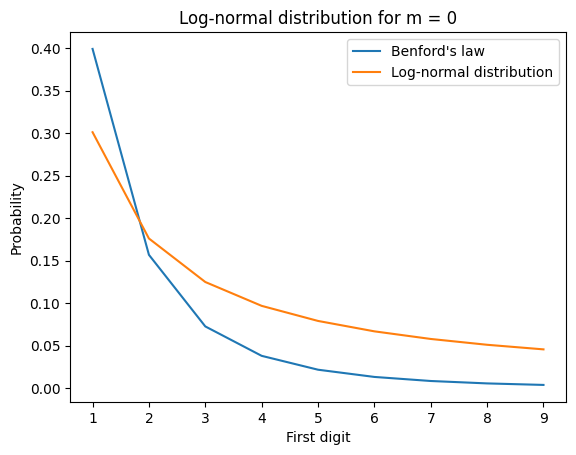

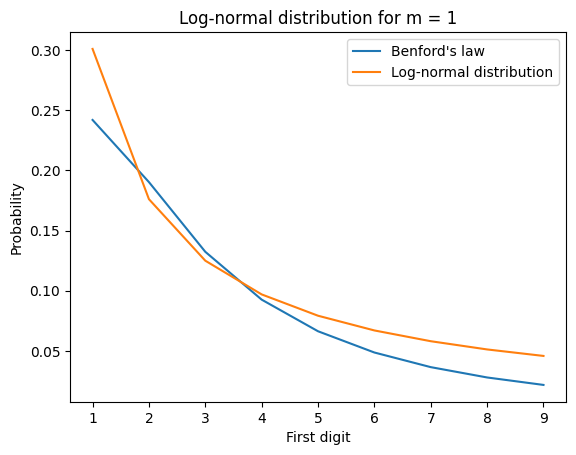

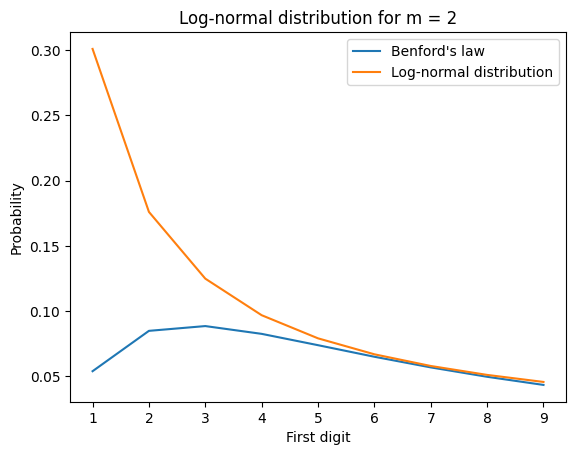

In [9]:
# part B.5: Log-normal distribution for Benford's law

# log-normal distribution
LogNormal = lambda x, m, s: (1 / (x * s * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x) - m) ** 2) / (2 * s ** 2))

# m from 0 to 2
for m in range(0, 3):
  # plot graph for log-normal distribution
  plt.plot(range(1, 10), [LogNormal(x, m, 1) for x in range(1, 10)])
  # plot graph for Benford's law
  plt.plot(range(1, 10), [Pd(d) for d in range(1, 10)])

  # add title for each graph
  plt.title(f'Log-normal distribution for m = {m}')

  # add labels
  plt.xlabel('First digit')
  plt.ylabel('Probability')

  # add legend
  plt.legend(['Benford\'s law', 'Log-normal distribution'])

  # show graph
  plt.show()

# here the best fit for log-normal distribution to Benford's law m must be 0 or 1 bigger than 1 is not good fit

# Analysis

  * Well here we can see that for $m = 0$ and $m = 1$ the log-normal distribution is best fit for Benford's law.
And now for values between 0 and 1, I have plotted the graph for log-normal distribution and Benford's law.
0.8 for log-normal distribution is best fit for Benford's law.
  * Log-normal distribution is the best fit for Benford's law, so far.

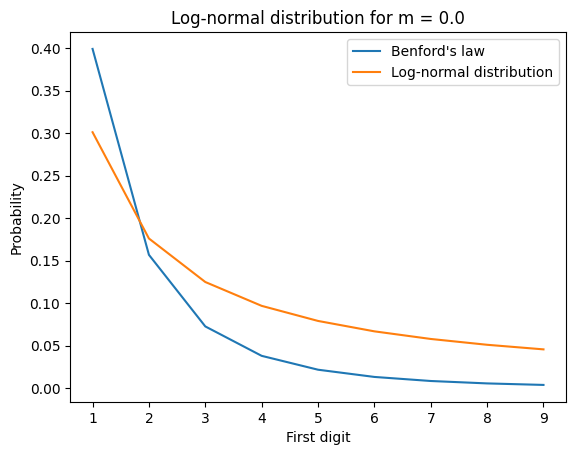

0.4756346341018326


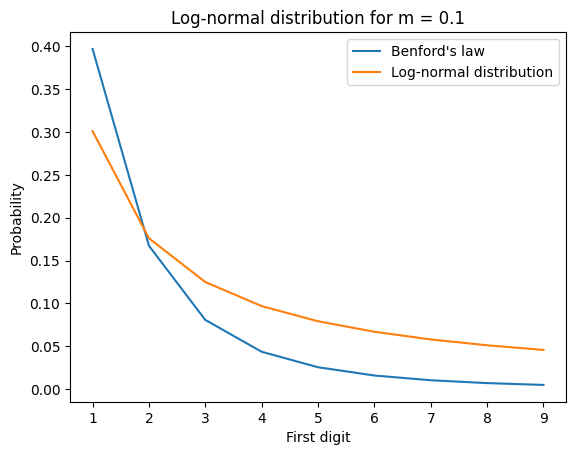

0.4394675997508302


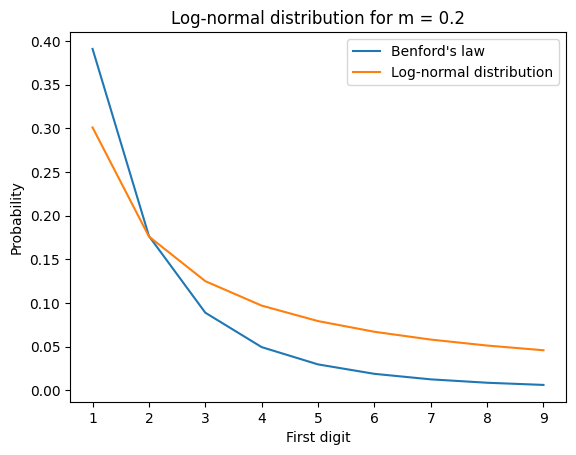

0.40002448583934386


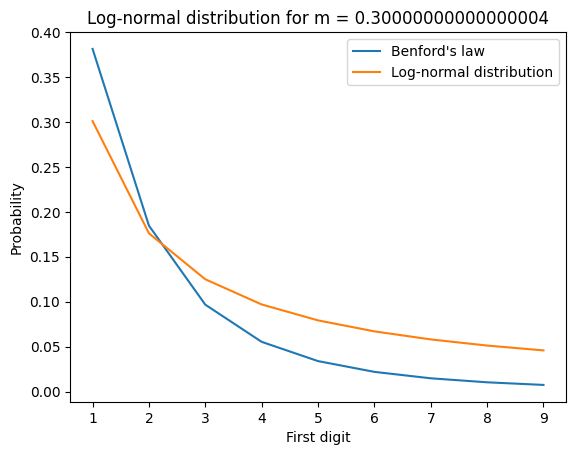

0.3718411335092043


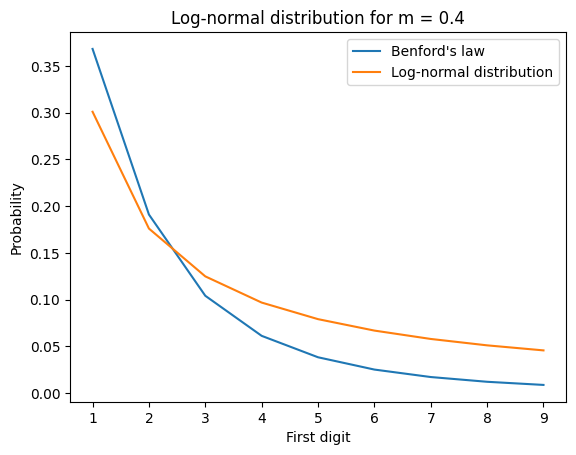

0.33771979716346695


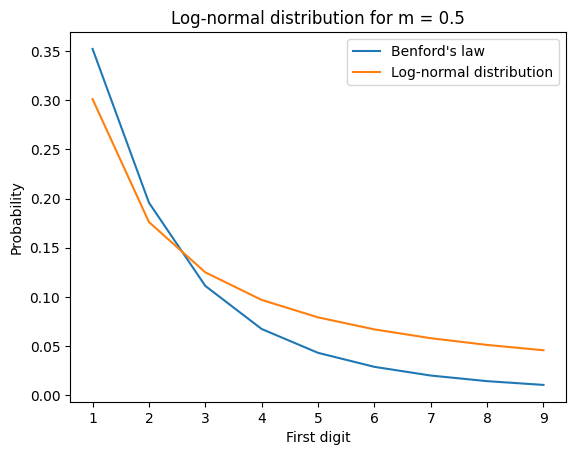

0.2982512718829114


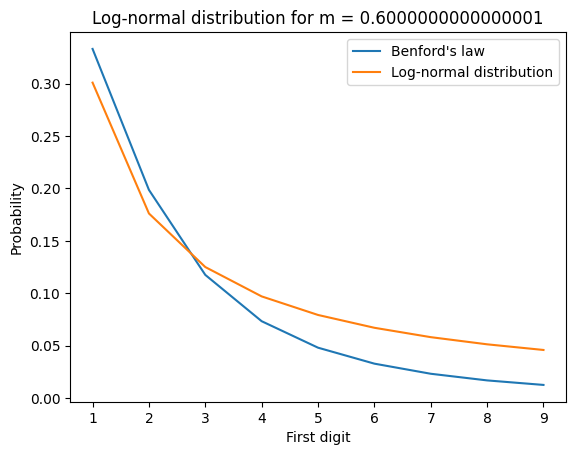

0.25420546338225614


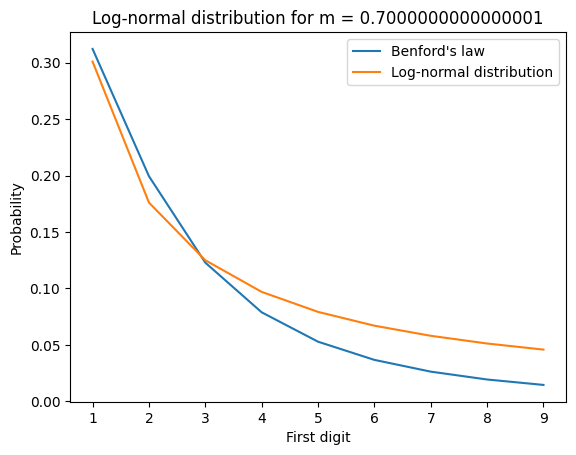

0.20650641387930108


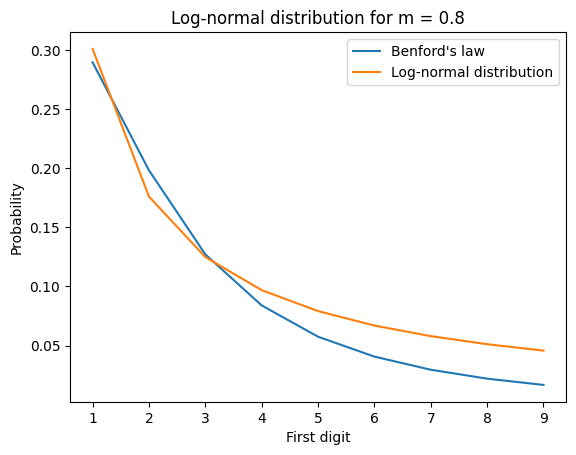

0.18336368257889107


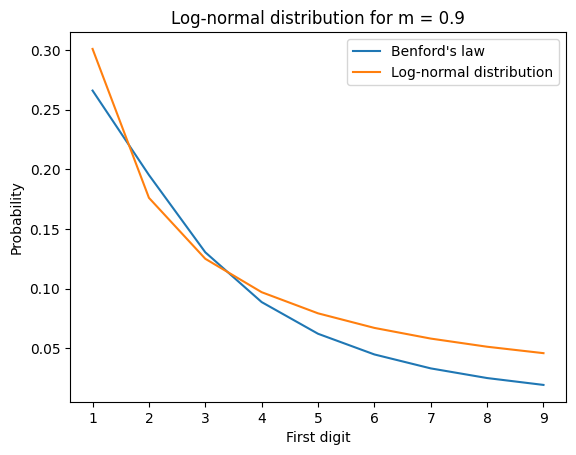

0.1851958224140423


In [10]:
# for 0 < m < 1

for m in np.arange(0, 1, 0.1):
  # plot graph for log-normal distribution
  plt.plot(range(1, 10), [LogNormal(x, m, 1) for x in range(1, 10)])
  # plot graph for Benford's law
  plt.plot(range(1, 10), [Pd(d) for d in range(1, 10)])

  # calculate the difference between log-normal distribution and Benford's law
  diff = [abs(LogNormal(x, m, 1) - Pd(x)) for x in range(1, 10)]

  # add title for each graph
  plt.title(f'Log-normal distribution for m = {m}')

  # add labels
  plt.xlabel('First digit')
  plt.ylabel('Probability')

  # add legend
  plt.legend(['Benford\'s law', 'Log-normal distribution'])

  # show graph
  plt.show()

  # print the difference between log-normal distribution and Benford's law
  print(sum(diff))

# Part C)
   * Benford's law for $k$-digit numbers
$$P(d;n) = \sum_{k=10^{n-2}}^{10^{n-1}-1}\log_{10}(1 + \frac{1}{10k+d})$$
   * Benford's law for $k$-digit, this is for $d_{1}...d_{k-1}$ leading digits and last digit is $d_{k}$.

# Analysis

  * Here as you can see for 9th digit all the probabilities are very close to each other.


In [34]:
# Part C: Benford's law for $k$-digit numbers k from 1 to 5

# Benford's law for $k$-digit numbers for example k = 2 => d = '11' if first digit is 1 what is the probability
# that the second digit is 1 as well
Pd_n = lambda d, n: sum([log10(1 + 1 / (10 * k + d)) for k in range(int(10 ** (n - 2)), int(10 ** (n - 1)))])

ans = {}

# end
the_end = [
  'st',
  'nd',
  'rd',
  *(['th'] * 100),
]

# for n digit numbers
for n in range(1, 6):
  ans[f'{n}{the_end[n - 1]}'] = {}
  for d in range(0 if n > 1 else 1, 10):
    ans[f'{n}{the_end[n - 1]}'][f'{d}'] = Pd_n(d, n)

# convert to pandas data frame
df = pd.DataFrame.from_dict(ans, orient='index', columns=[f'{d}' for d in range(0, 10)])
# sort the data frame by index
df.sort_index(inplace=True)

df

,0,1,2,3,4,5,6,7,8,9
1st,NaN,0.301030,0.176091,0.124939,0.096910,0.079181,0.066947,0.057992,0.051153,0.045757
2nd,0.119679,0.113890,0.108821,0.104330,0.100308,0.096677,0.093375,0.090352,0.087570,0.084997
3rd,0.101784,0.101376,0.100972,0.100573,0.100178,0.099788,0.099401,0.099019,0.098641,0.098267
4th,0.100176,0.100137,0.100098,0.100059,0.100019,0.099980,0.099941,0.099902,0.099863,0.099824
5th,0.100018,0.100014,0.100010,0.100006,0.100002,0.099998,0.099994,0.099990,0.099986,0.099982


# Part D)
   * Benford's law mathematical expectation and variance

$$P(d;n) = \sum_{k=10^{n-2}}^{10^{n-1}-1}\log_{10}(1 + \frac{1}{10k+d})$$

$$E[P(d;n)] = \sum_{d=0}^{9}dP(d;n)$$

$$Var[P(d;n)] = \sum_{d=0}^{9}(d - E[P(d;n)])^2P(d;n)$$

# Analysis

  * Firstly, I have calculated the expectation and variance for 1 to 7.
    * The complexity of calculating the expectation and variance is $O(n)$, so for $n > 7$ it takes too long to calculate.
  * Secondly, the last are so close to each other, so I have calculated the expectation and variance for 8 and 9.
    * The expectation for 8 and 9 is 4.5 and the variance is 8.25.

In [41]:
# Part D: Benford's law mathematical expectation and variance
# Benford's law for $k$-digit numbers for example k = 2 => d = '11' if first digit is 1 what is the probability

# expectation of P(d;n)
E_Pd_n = lambda n: sum([d * Pd_n(d, n) for d in range(0 if n > 1 else 1, 10)])
# Variance of P(d;n)
var_Pd_n = lambda n: sum([((d - E_Pd_n(n)) ** 2) * Pd_n(d, n) for d in range(0 if n > 1 else 1, 10)])

Exp_Pd_n = {}
# calculate expectation and variance for 1 to 9
for n in range(1, 8):  # can't calculate for n > 7 because it takes too long
  Exp_Pd_n[n] = {}
  Exp_Pd_n[n]['Expectation'] = E_Pd_n(n)
  Exp_Pd_n[n]['Variance'] = var_Pd_n(n)

# convert to pandas data frame
df = pd.DataFrame.from_dict(Exp_Pd_n, orient='index', columns=['Expectation', 'Variance'])
# sort the data frame by index
df.sort_index(inplace=True)

df

# the 8 and 9 will be Exp = 4.5 and Var = 8.25

,Expectation,Variance
1,3.440237,6.056513
2,4.187390,8.253779
3,4.467766,8.250094
4,4.496775,8.250001
5,4.499678,8.250000
6,4.499968,8.250000
7,4.499997,8.250000


# Part E)
   * E.1) crete network (ER model, Scale-free model, Small-world model)
   * E.2) 
      * Part A using formula => $d(A,BN)=\sum_{i=1}^{n}|p_{i}^A-p_{i}^{BN}|$
      * Part B using formula below the other formula
   * Just show the graph

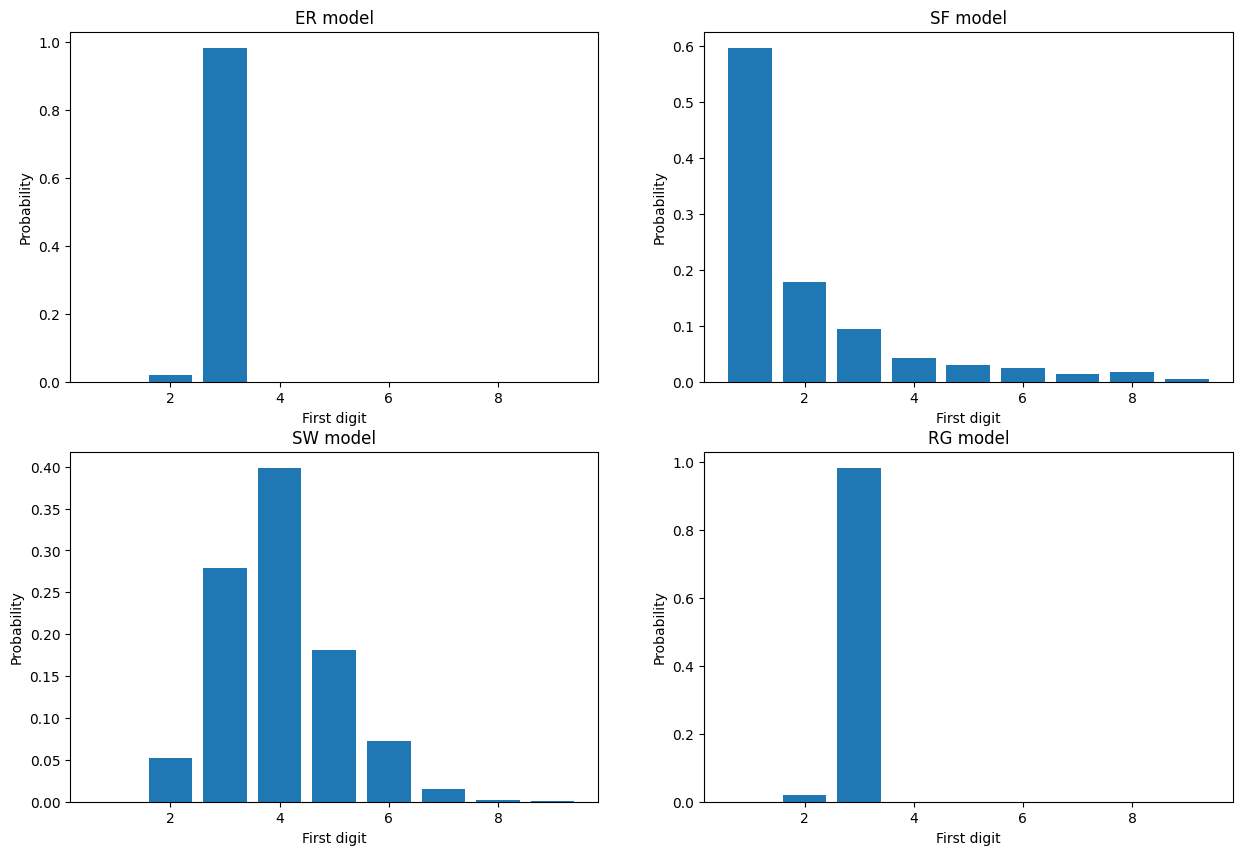

,ER,SF,SW,RG
J_divergence,6.588725,0.237908,3.062011,6.588725
delta_d,1.712123,0.593757,1.124046,1.712123
number of edges,164707.000000,2224.000000,2000.000000,165348.000000
number of nodes,1000.000000,1000.000000,1000.000000,1000.000000


In [62]:
# Part E.1) crete network (ER model, Scale-free model, Small-world model)

import networkx as nx

# eps
eps = 1e-9  # can't have zero in the second formula
# number of nodes
num_nodes = 1000

# first create ER model 
ER = nx.erdos_renyi_graph(n=num_nodes, p=0.33, seed=None, directed=False)
# second create Scale-free model
SF = nx.scale_free_graph(n=num_nodes, alpha=0.41, beta=0.54, gamma=0.05, delta_in=0.2, delta_out=0)
# third create Small-world model
SW = nx.watts_strogatz_graph(n=num_nodes, k=4, p=0.33, seed=None)
# forth create random graph
RG = nx.gnp_random_graph(n=num_nodes, p=0.33, seed=None, directed=False)

# count numbers of each node
ER_num_count = {i: 0 for i in range(1, 10)}
SF_num_count = {i: 0 for i in range(1, 10)}
SW_num_count = {i: 0 for i in range(1, 10)}
RG_num_count = {i: 0 for i in range(1, 10)}

# count numbers of each node
for i in range(num_nodes):
  ER_num_count[int(str(ER.degree[i])[0])] += 1
  SF_num_count[int(str(SF.degree[i])[0])] += 1
  SW_num_count[int(str(SW.degree[i])[0])] += 1
  RG_num_count[int(str(RG.degree[i])[0])] += 1

# convert to Probability
ER_num_count = {k: v / num_nodes if v != 0 else eps for k, v in ER_num_count.items()}
SF_num_count = {k: v / num_nodes if v != 0 else eps for k, v in SF_num_count.items()}
SW_num_count = {k: v / num_nodes if v != 0 else eps for k, v in SW_num_count.items()}
RG_num_count = {k: v / num_nodes if v != 0 else eps for k, v in RG_num_count.items()}

# plot graph for each network
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# plot graph for ER model
ax[0, 0].bar(ER_num_count.keys(), ER_num_count.values())
# plot graph for SF model
ax[0, 1].bar(SF_num_count.keys(), SF_num_count.values())
# plot graph for SW model
ax[1, 0].bar(SW_num_count.keys(), SW_num_count.values())
# plot graph for RG model
ax[1, 1].bar(RG_num_count.keys(), RG_num_count.values())

# add labels
ax[0, 0].set_xlabel('First digit')
ax[0, 0].set_ylabel('Probability')
ax[0, 1].set_xlabel('First digit')
ax[0, 1].set_ylabel('Probability')
ax[1, 0].set_xlabel('First digit')
ax[1, 0].set_ylabel('Probability')
ax[1, 1].set_xlabel('First digit')
ax[1, 1].set_ylabel('Probability')

# add title
ax[0, 0].set_title('ER model')
ax[0, 1].set_title('SF model')
ax[1, 0].set_title('SW model')
ax[1, 1].set_title('RG model')

# show graph
plt.show()

# getting graph sizes
graph_sizes = [ER.size(), SF.size(), SW.size(), RG.size()]

# delta_d
delta_d = {
  'ER': 0,
  'SF': 0,
  'SW': 0,
  'RG': 0
}
J_divergence = {
  'ER': 0,
  'SF': 0,
  'SW': 0,
  'RG': 0
}

for i in range(1, 10):
  # delta_d
  delta_d['ER'] += abs(ER_num_count[i] - Pd(i))
  delta_d['SF'] += abs(SF_num_count[i] - Pd(i))
  delta_d['SW'] += abs(SW_num_count[i] - Pd(i))
  delta_d['RG'] += abs(RG_num_count[i] - Pd(i))
  # J divergence
  J_divergence['ER'] += ER_num_count[i] * log10(ER_num_count[i] / Pd(i)) + Pd(i) * log10(Pd(i) / ER_num_count[i])
  J_divergence['SF'] += SF_num_count[i] * log10(SF_num_count[i] / Pd(i)) + Pd(i) * log10(Pd(i) / SF_num_count[i])
  J_divergence['SW'] += SW_num_count[i] * log10(SW_num_count[i] / Pd(i)) + Pd(i) * log10(Pd(i) / SW_num_count[i])
  J_divergence['RG'] += RG_num_count[i] * log10(RG_num_count[i] / Pd(i)) + Pd(i) * log10(Pd(i) / RG_num_count[i])

# convert to pandas data frame delta_d, j_divergence, number of nodes, number of edges
df = pd.DataFrame.from_dict({
  'delta_d': delta_d,
  'J_divergence': J_divergence,
  'number of nodes': {
    'ER': round(ER.number_of_nodes()),
    'SF': round(SF.number_of_nodes()),
    'SW': round(SW.number_of_nodes()),
    'RG': round(RG.number_of_nodes())
  },
  'number of edges': {
    'ER': round(ER.number_of_edges()),
    'SF': round(SF.number_of_edges()),
    'SW': round(SW.number_of_edges()),
    'RG': round(RG.number_of_edges())
  },
}, orient='index')
# sort the data frame by index
df.sort_index(inplace=True)

df

# Final Analiysis

  * Firstly, we can see the SF is the best fit for Benford's law.
  * Secondly, we can see that the ER and RG are the worst fit for Benford's law.
  * Thirdly, we can see that the SW is better than ER and RG but worse than SF.
  * Fourthly, we can see that the number of nodes and edges for ER and RG are so close to each other.
  * Fifthly, we can see that the number of edges for SW is much less than ER and RG, more close to SF.
# 
### finally, we can see J_divergence and delta_d is practically the same for all the networks. 